### 실습 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [2]:
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [3]:
print("MNIST LEN : {}".format(len(mnist_test)))

MNIST LEN : 10000


In [4]:
image, label = mnist_test.__getitem__(0)
print("Image data 형태 : ", image.size())
print("Label : ", label)

Image data 형태 :  torch.Size([1, 28, 28])
Label :  7


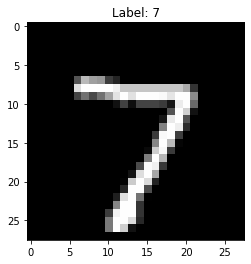

In [5]:
img = image.numpy()
plt.title("Label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [6]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [7]:
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
        self.b1 = np.zeros((n_hidden1,), dtype=np.float32)
        
        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32)
        self.b2 = np.zeros((n_hidden2,), dtype=np.float32)
        
        self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32)
        self.b3 = np.zeros((n_output,), dtype=np.float32)
        
    def __call__(self, x):
        x = x.reshape(-1)
        
        h1 = sigmoid(np.dot(self.W1, x) + self.b1)
        h2 = np.dot(self.W2, h1) + self.b2
        out = np.dot(self.W3, h2) + self.b3
        
        return softmax(out)

In [8]:
img_x = image.size()[1]
img_y = image.size()[2]
model = MyMLP(img_x*img_y, 256, 128, 10)

In [9]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [10]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

In [11]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


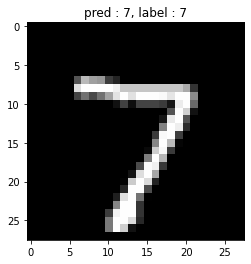

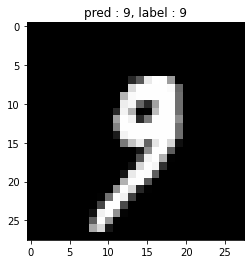

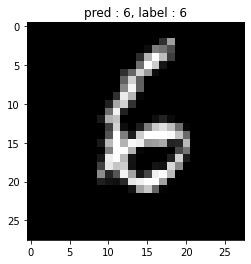

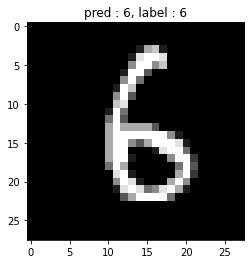

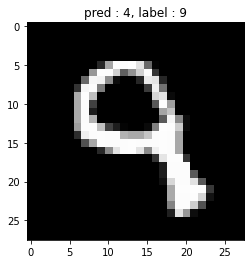

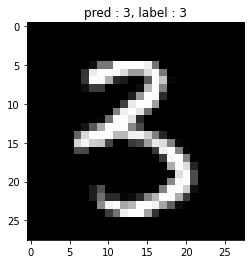

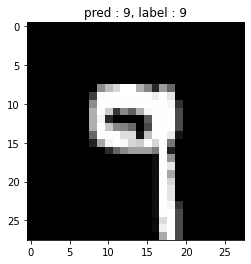

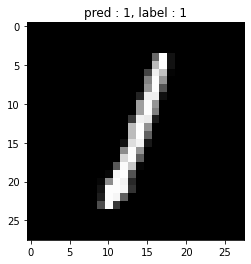

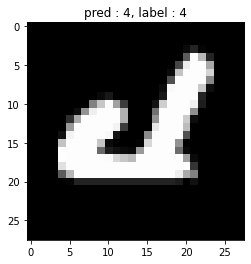

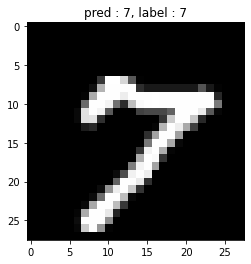

ACC : 91.91


In [12]:
mysum = 0

m = len(mnist_test)
cnt = 0

for i in range(m):
    image, label = mnist_test.__getitem__(i)
    output = model(image)
    
    if i % 1000 == 0:
        img = image.numpy()
        pred_label = np.argmax(output)
        plt.title("pred : %d, label : %d" %(pred_label, label))
        plt.imshow(img[0], cmap='gray')
        plt.show()
        
    cnt += 1
    mysum += (np.argmax(output) == label)
print("ACC : %.2f"%((float(mysum)/cnt)*100.0))